In [168]:
import pandas as pd
import seaborn as sns
from pprint import pprint
from IPython.display import display


# Data Exploration

In [169]:
dataset = pd.read_csv('Data/fuel-consumption-ratings-2023.csv',encoding='ISO-8859-1')#our dataset is record data(matrix)



In [170]:
print(dataset.keys())


Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')


In [171]:
dataset.head(5) 
#comb mpg contains same information as comb l/100km with different measurement units one can be extracted from other 
#we can do a check if the extraction was exact.
#we can check if what smog rating 1 vs 8 means

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0


In [172]:
dataset.info() # our dataset dimensionality is 15 with 856 number of rows.
#year is not considered here as numerical we should explore further

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        841 non-null    object 
 1   Make                        854 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

In [173]:
dataset.describe() 
#smog rating and co2 rating are categorical(ordinal) we can't extract std,mean etc.

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [174]:
numerical_columns = ['Engine Size (L)', 'Cylinders', 'Fuel Consumption (L/100Km)',
                         'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
                         'CO2 Emissions (g/km)']

subset_df = dataset[numerical_columns]
subset_df.describe()

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km)
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789
std,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000
75%,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000


In [175]:
dataset.duplicated().sum()


0

In [176]:
dataset.isnull().sum(axis = 0) # we have a small number of null values to handle

Year                          15
Make                           2
Model                         23
Vehicle Class                 23
Engine Size (L)               23
Cylinders                     23
Transmission                  23
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

In [177]:
dataset.describe(include=['object'])


,Year,Make,Model,Vehicle Class,Transmission,Fuel Type
count,841,854,833,833,833,833
unique,9,60,657,14,23,4
top,2023,Ford,Mustang,SUV: Small,AS8,Z
freq,833,93,5,195,199,408


In [178]:
print(dataset['Year'].unique()) # we have noisy data in year column



['2023' nan 'Understanding the table' 'Model' 'Transmission' 'Fuel type'
 'Fuel consumption' 'CO2 emissions' 'CO2 rating' 'Smog rating']


In [179]:
def display_unique_values(df, column_name):
    pd.set_option('display.max_rows', None)

    value_counts = df[column_name].value_counts()

    unique_values_df = pd.DataFrame({
    'Unique_Values': value_counts.index,
    'Record_Count': value_counts.values
    })
    pd.reset_option('display.max_rows')

    print(unique_values_df)

In [180]:
display_unique_values(dataset,'Year')
#we dont have too much noisy data and we can choose to treat them as null or remove column entirely

             Unique_Values  Record_Count
0                     2023           833
1  Understanding the table             1
2                    Model             1
3             Transmission             1
4                Fuel type             1
5         Fuel consumption             1
6            CO2 emissions             1
7               CO2 rating             1
8              Smog rating             1


In [181]:
pprint(dataset['Vehicle Class'].unique()) #we don't see any unexpected values in this column

array(['Full-size', 'SUV: Small', 'SUV: Standard', 'Compact', 'Mid-size',
       'Minicompact', 'Two-seater', 'Subcompact', 'Station wagon: Small',
       'Station wagon: Mid-size', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Special purpose vehicle',
       nan], dtype=object)


In [182]:
display_unique_values(dataset,'Vehicle Class')


              Unique_Values  Record_Count
0                SUV: Small           195
1             SUV: Standard           135
2                  Mid-size           112
3    Pickup truck: Standard            97
4                Subcompact            75
5                   Compact            62
6                 Full-size            48
7                Two-seater            35
8               Minicompact            22
9       Pickup truck: Small            17
10     Station wagon: Small            14
11  Station wagon: Mid-size             9
12                  Minivan             7
13  Special purpose vehicle             5


In [183]:
print(dataset['Transmission'].unique())


['AV7' 'M6' 'AS10' 'A8' 'A9' 'AM7' 'AS8' 'AM8' 'AV' 'AS9' 'A10' 'A6' 'M7'
 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AS6' 'AV10' 'M5' 'AS5' 'A7' nan]


In [184]:
display_unique_values(dataset,'Transmission')


   Unique_Values  Record_Count
0            AS8           199
1             A8           105
2           AS10           102
3             A9            69
4            A10            59
5             M6            57
6            AM7            49
7             AV            40
8            AS6            27
9            AM8            24
10           AV8            23
11           AS9            22
12           AV6            10
13           AM6             9
14           AV7             9
15          AV10             7
16            M7             6
17           AS7             4
18           AV1             4
19            M5             3
20           AS5             2
21            A6             2
22            A7             1


In [185]:
print(dataset['Fuel Type'].unique())  #we should explore more on these labels meaning 


['Z' 'X' 'D' 'E' nan]


In [186]:
display_unique_values(dataset,'Fuel Type')


  Unique_Values  Record_Count
0             Z           408
1             X           390
2             D            20
3             E            15


In [187]:
print(dataset['Make'].unique())
# we should study if some values are noisy 
#because they don't really indicate the purpose of the column


['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Genesis'
 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini'
 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'MINI'
 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce' 'Subaru' 'Toyota'
 'Volkswagen' 'Volvo' nan '4WD/4X4 = Four-wheel drive'
 'AWD = All-wheel drive' 'FFV = Flexible-fuel vehicle'
 'SWB = Short wheelbase' 'LWB = Long wheelbase' 'EWB = Extended wheelbase'
 'A = automatic' 'AM = automated manual'
 'AS = automatic with select shift' 'AV = continuously variable'
 'M = manual' '3 \x96 10 = Number of gears' 'X = regular gasoline'
 'Z = premium gasoline' 'D = diesel' 'E = ethanol (E85)' 'N = natural gas'
 'City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)'
 'the ta

In [188]:

display_unique_values(dataset,'Make')


                                        Unique_Values  Record_Count
0                                                Ford            93
1                                           Chevrolet            55
2                                       Mercedes-Benz            54
3                                                 BMW            51
4                                              Toyota            46
5                                                Audi            44
6                                                 GMC            36
7                                                Jeep            30
8                                              Nissan            27
9                                               Lexus            26
10                                           Cadillac            26
11                                               MINI            25
12                                                Kia            23
13                                            Hy

In [189]:
print(dataset['Model'].unique())


['Integra' 'Integra A-SPEC' 'MDX SH-AWD' 'MDX SH-AWD Type S' 'RDX SH-AWD'
 'RDX SH-AWD A-SPEC' 'TLX SH-AWD' 'TLX SH-AWD A-SPEC' 'TLX Type S'
 'Giulia' 'Giulia AWD' 'Giulia Quadrifoglio' 'Stelvio' 'Stelvio AWD'
 'Stelvio AWD Quadrifoglio' 'Tonale AWD' 'DB11 V8' 'DB11 V12' 'DBS V12'
 'DBX V8' 'DBX707' 'Vantage V8' 'V12 Vantage' 'A3 40 TFSI quattro'
 'A4 Sedan 45 TFSI quattro' 'A4 allroad 45 TFSI quattro'
 'A5 Cabriolet 45 TFSI quattro' 'A5 Coupé 45 TFSI quattro'
 'A5 Sportback 45 TFSI quattro' 'A6 45 TFSI quattro' 'A6 55 TFSI quattro'
 'A6 allroad 55 TFSI quattro' 'A7 Sportback 55 TFSI quattro'
 'A8 L Sedan 55 TFSI quattro' 'Q3 40 TFSI quattro' 'Q3 45 TFSI quattro'
 'Q5 40 TFSI quattro' 'Q5 45 TFSI quattro' 'Q5 Sportback 45 TFSI quattro'
 'Q7 45 TFSI quattro' 'Q7 55 TFSI quattro' 'Q8 55 TFSI quattro'
 'R8 Coupé Performance' 'R8 Coupé Performance quattro'
 'R8 Spyder Performance' 'R8 Spyder Performance quattro' 'R8 GT Coupé'
 'RS 5 Coupé quattro' 'RS 5 Sportback quattro' 'RS 6 Avant quatt

In [190]:
display_unique_values(dataset,'Model')


                                    Unique_Values  Record_Count
0                                         Mustang             5
1                  F-150 FFV (Without Stop-Start)             4
2                                 Civic Hatchback             4
3                     Sierra 4WD Mud Terrain Tire             4
4                                       F-150 FFV             4
..                                            ...           ...
652                    F-150 (Without Stop-Start)             1
653                           Explorer Hybrid AWD             1
654  Explorer Timberline AWD (Without Stop-Start)             1
655                       Explorer Timberline AWD             1
656                                   XC90 B6 AWD             1

[657 rows x 2 columns]


In [191]:
make_noise_data = [
    '4WD/4X4 = Four-wheel drive',
    'AWD = All-wheel drive',
    'FFV = Flexible-fuel vehicle',
    'SWB = Short wheelbase',
    'LWB = Long wheelbase',
    'EWB = Extended wheelbase',
    'A = automatic',
    'AM = automated manual',
    'AS = automatic with select shift',
    'AV = continuously variable',
    'M = manual',
    '3 – 10 = Number of gears',
    'X = regular gasoline',
    'Z = premium gasoline',
    'D = diesel',
    'E = ethanol (E85)',
    'N = natural gas',
    '3  10 = Number of gears'
    'City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)',
    'the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving',
    'the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)',
    'the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)'
]

# Filter rows where 'Make' is in noise_data
filtered_rows = dataset[dataset['Make'].isin(make_noise_data)]
filtered_rows.isnull().sum(axis = 0) 

filtered_rows.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 835 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6 non-null      object 
 1   Make                        19 non-null     object 
 2   Model                       0 non-null      object 
 3   Vehicle Class               0 non-null      object 
 4   Engine Size (L)             0 non-null      float64
 5   Cylinders                   0 non-null      float64
 6   Transmission                0 non-null      object 
 7   Fuel Type                   0 non-null      object 
 8   Fuel Consumption (L/100Km)  0 non-null      float64
 9   Hwy (L/100 km)              0 non-null      float64
 10  Comb (L/100 km)             0 non-null      float64
 11  Comb (mpg)                  0 non-null      float64
 12  CO2 Emissions (g/km)        0 non-null      float64
 13  CO2 Rating                  0 non-null 

In [192]:
display(filtered_rows)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
835,Model,4WD/4X4 = Four-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,AWD = All-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,NaN,FFV = Flexible-fuel vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,SWB = Short wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,LWB = Long wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,NaN,EWB = Extended wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,Transmission,A = automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,NaN,AM = automated manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,NaN,AS = automatic with select shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,NaN,AV = continuously variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
filtered_rows.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 835 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6 non-null      object 
 1   Make                        19 non-null     object 
 2   Model                       0 non-null      object 
 3   Vehicle Class               0 non-null      object 
 4   Engine Size (L)             0 non-null      float64
 5   Cylinders                   0 non-null      float64
 6   Transmission                0 non-null      object 
 7   Fuel Type                   0 non-null      object 
 8   Fuel Consumption (L/100Km)  0 non-null      float64
 9   Hwy (L/100 km)              0 non-null      float64
 10  Comb (L/100 km)             0 non-null      float64
 11  Comb (mpg)                  0 non-null      float64
 12  CO2 Emissions (g/km)        0 non-null      float64
 13  CO2 Rating                  0 non-null 

In [194]:
year_noise_data = [
    'Understanding the table' ,'Model', 'Transmission' ,'Fuel type'
 'Fuel consumption' ,'CO2 emissions' ,'CO2 rating', 'Smog rating'
]

# Filter rows where 'Year' is in noise_data
filtered_rows = dataset[dataset['Year'].isin(year_noise_data)]

filtered_rows.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 834 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6 non-null      object 
 1   Make                        5 non-null      object 
 2   Model                       0 non-null      object 
 3   Vehicle Class               0 non-null      object 
 4   Engine Size (L)             0 non-null      float64
 5   Cylinders                   0 non-null      float64
 6   Transmission                0 non-null      object 
 7   Fuel Type                   0 non-null      object 
 8   Fuel Consumption (L/100Km)  0 non-null      float64
 9   Hwy (L/100 km)              0 non-null      float64
 10  Comb (L/100 km)             0 non-null      float64
 11  Comb (mpg)                  0 non-null      float64
 12  CO2 Emissions (g/km)        0 non-null      float64
 13  CO2 Rating                  0 non-null  

In [195]:
display(filtered_rows)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
834,Understanding the table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,Model,4WD/4X4 = Four-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,Transmission,A = automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,Smog rating,the tailpipe emissions of smog-forming polluta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
filtered_rows.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 834 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6 non-null      object 
 1   Make                        5 non-null      object 
 2   Model                       0 non-null      object 
 3   Vehicle Class               0 non-null      object 
 4   Engine Size (L)             0 non-null      float64
 5   Cylinders                   0 non-null      float64
 6   Transmission                0 non-null      object 
 7   Fuel Type                   0 non-null      object 
 8   Fuel Consumption (L/100Km)  0 non-null      float64
 9   Hwy (L/100 km)              0 non-null      float64
 10  Comb (L/100 km)             0 non-null      float64
 11  Comb (mpg)                  0 non-null      float64
 12  CO2 Emissions (g/km)        0 non-null      float64
 13  CO2 Rating                  0 non-null  

In [197]:
filtered_rows.isnull().sum(axis = 0) 

Year                          0
Make                          1
Model                         6
Vehicle Class                 6
Engine Size (L)               6
Cylinders                     6
Transmission                  6
Fuel Type                     6
Fuel Consumption (L/100Km)    6
Hwy (L/100 km)                6
Comb (L/100 km)               6
Comb (mpg)                    6
CO2 Emissions (g/km)          6
CO2 Rating                    6
Smog Rating                   6
dtype: int64

In [198]:
filtered_rows = dataset[dataset['Year'].isin(year_noise_data) & dataset['Make'].isin(make_noise_data)]
display(filtered_rows)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
835,Model,4WD/4X4 = Four-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,Transmission,A = automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,Smog rating,the tailpipe emissions of smog-forming polluta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
dataset = dataset.drop(dataset[dataset['Year'].isin(year_noise_data) & dataset['Make'].isin(make_noise_data)].index)

In [200]:
dataset.isnull().sum(axis = 0) 


Year                          15
Make                           2
Model                         18
Vehicle Class                 18
Engine Size (L)               18
Cylinders                     18
Transmission                  18
Fuel Type                     18
Fuel Consumption (L/100Km)    18
Hwy (L/100 km)                18
Comb (L/100 km)               18
Comb (mpg)                    18
CO2 Emissions (g/km)          18
CO2 Rating                    18
Smog Rating                   18
dtype: int64

In [201]:
dataset = dataset.drop(dataset[dataset['Year'].isin(year_noise_data)].index)

In [202]:
dataset = dataset.drop(
    dataset[(dataset['Make'].isin(make_noise_data)) |
            dataset['Make'].str.contains('City and highway fuel consumption', case=False, na=False) |
            dataset['Make'].str.contains('Number of gears', case=False, na=False)].index
)

In [203]:
dataset.isnull().sum(axis = 0) 


Year                          1
Make                          1
Model                         1
Vehicle Class                 1
Engine Size (L)               1
Cylinders                     1
Transmission                  1
Fuel Type                     1
Fuel Consumption (L/100Km)    1
Hwy (L/100 km)                1
Comb (L/100 km)               1
Comb (mpg)                    1
CO2 Emissions (g/km)          1
CO2 Rating                    1
Smog Rating                   1
dtype: int64

In [204]:
filtered_rows = dataset[dataset['Make'].isnull()]

display(filtered_rows)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
dataset = dataset.drop(dataset[dataset['Year'].isnull()].index)


In [206]:
#handling null values example
#dataset['CO2 Emissions (g/km)'].fillna('mean', inplace=True)
#dataset['Fuel Type'].fillna(dataset['Fuel Type'].mode()[0], inplace=True)


In [207]:
dataset.isnull().sum(axis = 0)  #null values after data cleaning

Year                          0
Make                          0
Model                         0
Vehicle Class                 0
Engine Size (L)               0
Cylinders                     0
Transmission                  0
Fuel Type                     0
Fuel Consumption (L/100Km)    0
Hwy (L/100 km)                0
Comb (L/100 km)               0
Comb (mpg)                    0
CO2 Emissions (g/km)          0
CO2 Rating                    0
Smog Rating                   0
dtype: int64

In [208]:
columns_to_exclude = ['Year', 'Comb (mpg)']

dataset = dataset.reindex(columns=[col for col in dataset.columns if col not in columns_to_exclude])


In [209]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 832
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        833 non-null    object 
 1   Model                       833 non-null    object 
 2   Vehicle Class               833 non-null    object 
 3   Engine Size (L)             833 non-null    float64
 4   Cylinders                   833 non-null    float64
 5   Transmission                833 non-null    object 
 6   Fuel Type                   833 non-null    object 
 7   Fuel Consumption (L/100Km)  833 non-null    float64
 8   Hwy (L/100 km)              833 non-null    float64
 9   Comb (L/100 km)             833 non-null    float64
 10  CO2 Emissions (g/km)        833 non-null    float64
 11  CO2 Rating                  833 non-null    float64
 12  Smog Rating                 833 non-null    float64
dtypes: float64(8), object(5)
memory usage: 9

In [210]:
combined_aggregation = dataset.groupby('Make').agg({
    'Fuel Consumption (L/100Km)': ['mean', 'min', 'max'],  
})

combined_aggregation = combined_aggregation.sort_values(by=('Fuel Consumption (L/100Km)', 'mean'), ascending=False)

display(combined_aggregation)


Fuel Consumption (L/100Km)            
                                    mean   min   max
Make                                                
Bugatti                        29.133333  26.8  30.3
Rolls-Royce                    20.042857  19.9  20.2
Lamborghini                    17.600000  16.6  18.2
Bentley                        17.533333  15.3  20.3
Dodge                          15.804348  11.2  20.5
Aston Martin                   15.514286  13.0  17.2
Maserati                       14.652941  10.6  17.4
Ram                            14.590909  11.1  22.4
GMC                            14.230556   9.7  21.3
Chevrolet                      13.854545   8.0  21.3
Chrysler                       13.528571  12.4  15.9
Ford                           13.509677   5.6  22.8
BMW                            13.417647   9.4  17.9
Jeep                           13.293333   9.9  18.6
Lincoln                        13.287500  11.2  15.7
Mercedes-Benz                  13.283333   9.8  23.5
Land Rover                     13.261905  11.3  16.4
Jaguar                         13.225000   9.4  15.4
Porsche                        13.100000  12.8  13.8
Cadillac                       12.946154  10.2  21.6
Infiniti                       12.600000  10.4  17.5
Audi                           12.500000   8.7  17.7
Genesis                        12.433333  10.7  14.8
Alfa Romeo                     11.457143  10.0  13.9
Lexus                          11.050000   5.5  16.2
Acura                          10.840000   7.9  13.8
Nissan                         10.392593   7.4  17.5
Volvo                          10.333333   9.0  11.9
Volkswagen                     10.289474   7.7  13.4
Subaru                         10.276471   8.4  12.7
FIAT                           10.000000  10.0  10.0
Buick                           9.916667   8.0  13.6
MINI                            9.436000   8.2  10.9
Mazda                           9.423810   8.4  11.6
Honda                           9.390909   5.0  13.0
Toyota                          9.228261   4.4  14.9
Hyundai                         9.056522   4.8  12.6
Mitsubishi                      9.000000   6.6  10.3
Kia                             8.878261   4.5  13.7

In [211]:
combined_aggregation = dataset.groupby('Make').agg({
    'CO2 Emissions (g/km)': ['mean', 'min', 'max'],  
})

combined_aggregation = combined_aggregation.sort_values(by=('CO2 Emissions (g/km)', 'mean'), ascending=False)

display(combined_aggregation)

CO2 Emissions (g/km)              
                              mean    min    max
Make                                            
Bugatti                 579.333333  522.0  608.0
Rolls-Royce             390.857143  388.0  397.0
Lamborghini             361.000000  345.0  370.0
Bentley                 347.444444  307.0  395.0
Aston Martin            314.000000  270.0  343.0
Dodge                   310.173913  231.0  410.0
Ram                     303.909091  253.0  465.0
GMC                     301.888889  211.0  364.0
Maserati                292.941176  218.0  349.0
Chevrolet               289.381818  180.0  392.0
Jeep                    281.833333  205.0  387.0
Land Rover              279.952381  244.0  350.0
Ford                    276.462366  140.0  460.0
Mercedes-Benz           274.555556  200.0  508.0
Lincoln                 274.250000  232.0  320.0
BMW                     273.392157  194.0  364.0
Porsche                 272.666667  264.0  275.0
Jaguar                  268.916667  197.0  316.0
Chrysler                267.571429  242.0  307.0
Cadillac                265.192308  206.0  436.0
Infiniti                261.833333  222.0  355.0
Genesis                 259.666667  225.0  298.0
Audi                    255.977273  183.0  361.0
Alfa Romeo              236.571429  205.0  288.0
Lexus                   229.230769  124.0  337.0
Acura                   226.500000  167.0  291.0
FIAT                    221.000000  221.0  221.0
Nissan                  218.074074  158.0  362.0
Subaru                  215.764706  178.0  262.0
Volvo                   215.500000  186.0  249.0
Volkswagen              215.368421  159.0  279.0
Buick                   213.500000  184.0  277.0
Toyota                  200.304348  110.0  323.0
Honda                   199.409091  124.0  275.0
Mazda                   198.047619  178.0  245.0
Hyundai                 193.869565  110.0  263.0
Mitsubishi              193.714286  143.0  218.0
MINI                    193.600000  170.0  217.0
Kia                     192.434783  104.0  280.0

In [212]:
combined_aggregation = dataset.groupby('Fuel Type').agg({
    'CO2 Emissions (g/km)': ['mean', 'min', 'max'],  
})

combined_aggregation = combined_aggregation.sort_values(by=('CO2 Emissions (g/km)', 'mean'), ascending=False)

display(combined_aggregation)

CO2 Emissions (g/km)              
                          mean    min    max
Fuel Type                                   
E                   287.200000  244.0  318.0
Z                   274.825980  139.0  608.0
D                   270.400000  247.0  288.0
X                   237.510256  104.0  460.0

In [213]:
combined_aggregation = dataset.groupby('Fuel Type').agg({
    'Fuel Consumption (L/100Km)': ['mean', 'min', 'max'],  
})

combined_aggregation = combined_aggregation.sort_values(by=('Fuel Consumption (L/100Km)', 'mean'), ascending=False)

display(combined_aggregation)

Fuel Consumption (L/100Km)            
                                mean   min   max
Fuel Type                                       
E                          19.746667  16.8  21.3
Z                          13.443873   5.7  30.3
X                          11.160769   4.4  22.8
D                          11.070000  10.0  11.7

In [214]:
bins = [0, 1.5, 3.0]
labels = [1, 2]
dataset_transformed = dataset
dataset_transformed['Engine Size Category'] = pd.cut(dataset['Engine Size (L)'], bins=bins, labels=labels)
print(dataset_transformed['Engine Size Category'].value_counts())


Engine Size Category
2    483
1     47
Name: count, dtype: int64


In [215]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_transformed['CO2 Emissions Normalized'] = scaler.fit_transform(dataset_transformed[['CO2 Emissions (g/km)']])
print(dataset_transformed[['CO2 Emissions Normalized']].head())

   CO2 Emissions Normalized
0                  0.125000
1                  0.134921
2                  0.152778
3                  0.315476
4                  0.371032


In [216]:
# Phase 2

In [217]:
import matplotlib.pyplot as plt
from tabulate import tabulate

In [218]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Make                        833 non-null    object  
 1   Model                       833 non-null    object  
 2   Vehicle Class               833 non-null    object  
 3   Engine Size (L)             833 non-null    float64 
 4   Cylinders                   833 non-null    float64 
 5   Transmission                833 non-null    object  
 6   Fuel Type                   833 non-null    object  
 7   Fuel Consumption (L/100Km)  833 non-null    float64 
 8   Hwy (L/100 km)              833 non-null    float64 
 9   Comb (L/100 km)             833 non-null    float64 
 10  CO2 Emissions (g/km)        833 non-null    float64 
 11  CO2 Rating                  833 non-null    float64 
 12  Smog Rating                 833 non-null    float64 
 13  Engine Size Category     

In [219]:
def extract_boxplot_values(bp):
    medians = [item.get_ydata()[0] for item in bp['medians']]
    means = [item.get_ydata()[0] for item in bp['means']]
    minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
    maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]

    print('Exact values from boxplot:\n')
    print(f'Medians: {medians}\n'
          f'Means: {means}\n'
          f'Minimums: {minimums}\n'
          f'Maximums: {maximums}')

    boxplot_stats_array = []
    for median, mean, minimum, maximum in zip(medians, means, minimums, maximums):
        array = [median, mean, minimum, maximum]
        boxplot_stats_array.append(array)    
    print('\n')
    print(tabulate(boxplot_stats_array, headers=[ "Median", "Mean", "Minimum", "Maximum"]))

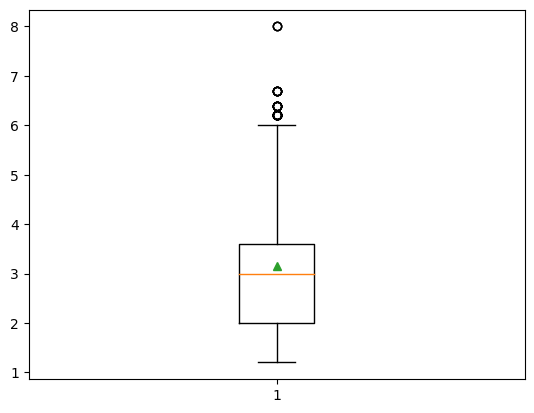

In [220]:
bp = plt.boxplot(dataset['Engine Size (L)'],showmeans=True)  # right-skewed (positively skewed),

In [221]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [3.0]
Means: [3.1478991596638655]
Minimums: [1.2]
Maximums: [6.0]


  Median    Mean    Minimum    Maximum
--------  ------  ---------  ---------
       3  3.1479        1.2          6


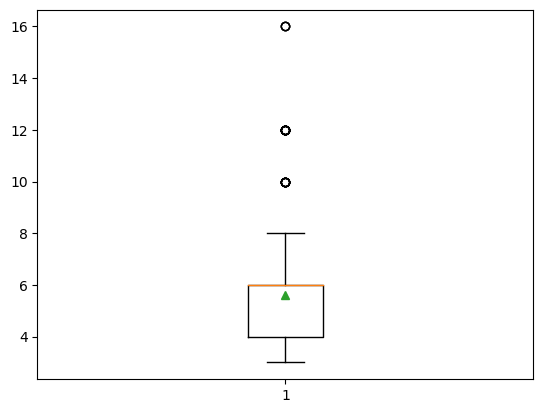

In [222]:
bp = plt.boxplot(dataset['Cylinders'],showmeans=True)  #left-skewed (negatively skewed)

In [223]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [6.0]
Means: [5.627851140456182]
Minimums: [3.0]
Maximums: [8.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
       6  5.62785          3          8


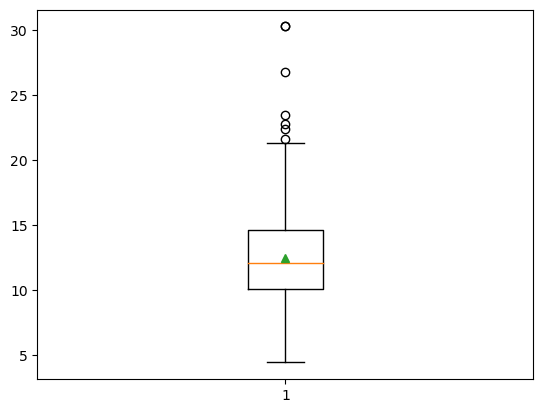

In [224]:
bp = plt.boxplot(dataset['Fuel Consumption (L/100Km)'],showmeans=True) # right-skewed (positively skewed)

In [225]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [12.1]
Means: [12.43145258103241]
Minimums: [4.4]
Maximums: [21.3]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
    12.1  12.4315        4.4       21.3


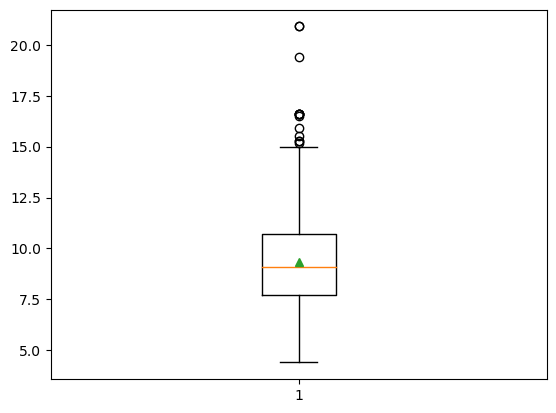

In [226]:
bp = plt.boxplot(dataset['Hwy (L/100 km)'],showmeans=True)  #relatively symetrical with very small right skew

In [227]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [9.1]
Means: [9.353661464585835]
Minimums: [4.4]
Maximums: [15.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
     9.1  9.35366        4.4         15


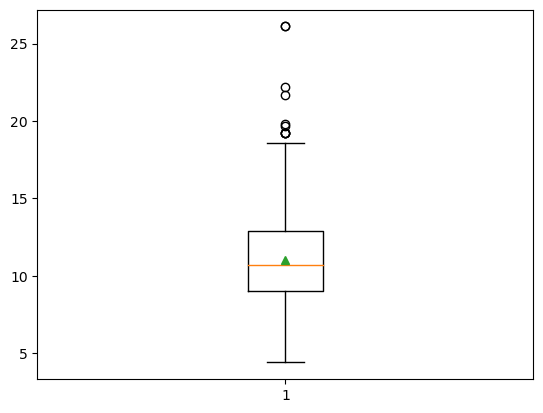

In [228]:
bp = plt.boxplot(dataset['Comb (L/100 km)'],showmeans=True) #right-skewed (positively skewed)

In [229]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [10.7]
Means: [11.047178871548619]
Minimums: [4.4]
Maximums: [18.6]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
    10.7  11.0472        4.4       18.6


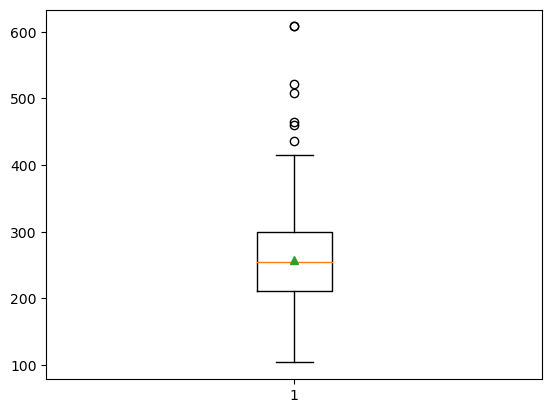

In [230]:
bp = plt.boxplot(dataset['CO2 Emissions (g/km)'],showmeans=True)  #slight indication of right skewness


In [231]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [254.0]
Means: [257.4717887154862]
Minimums: [104.0]
Maximums: [415.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
     254  257.472        104        415


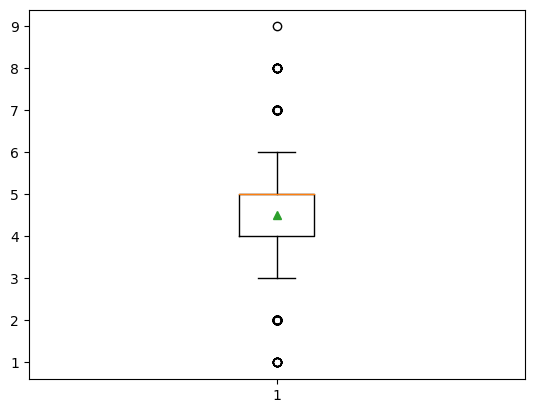

In [232]:
bp = plt.boxplot(dataset['CO2 Rating'],showmeans=True)  #left-skewed(negatively skewed)


In [233]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [5.0]
Means: [4.5222088835534215]
Minimums: [3.0]
Maximums: [6.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
       5  4.52221          3          6


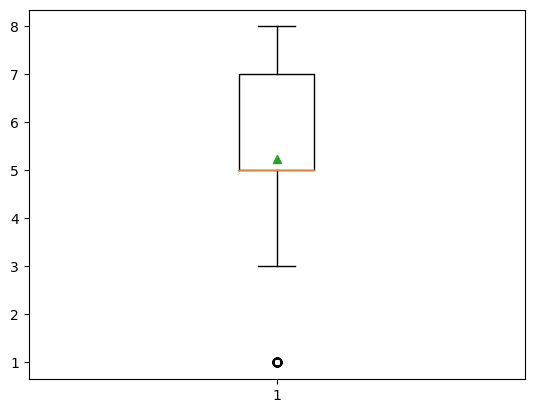

In [234]:
bp = plt.boxplot(dataset['Smog Rating'],showmeans=True)  # slight indication of left skewness


In [235]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [5.0]
Means: [5.236494597839136]
Minimums: [3.0]
Maximums: [8.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
       5  5.23649          3          8
